In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_auc_score,roc_curve,auc


In [2]:
df=pd.read_csv("/content/drive/My Drive/Dataset/micro credit/Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# ***EDA***

In [4]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

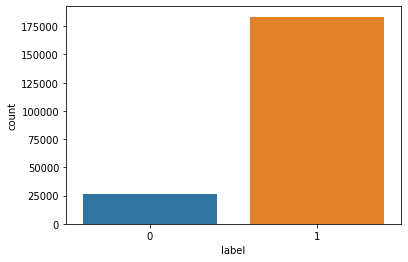

In [5]:
sns.countplot(df['label'])

In [6]:
data = [df]
for column in data:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [7]:
count_balance = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance = count_balance.transpose()


In [8]:
balance = pd.DataFrame(df['balance_group'].value_counts())
balance['% Subscription'] = count_balance[1]
balance.drop('balance_group',axis = 1,inplace = True)

balance['balance'] = [1,2,0,3]
balance = balance.sort_values('balance',ascending = True)


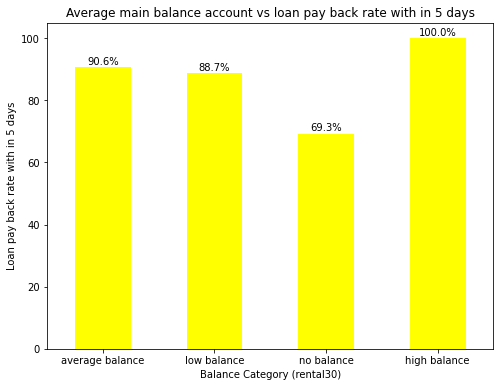

In [9]:
plot_balance = balance['% Subscription'].plot(kind = 'bar',color = ('yellow'),figsize = (8,6))
plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      balance['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1,label+'%',ha ='center',color='black')
    

From above bar plot we can observe that how customers with different main balance levels are paying back the loan with in five days. The high balance level people are with 100% rate i.e they are paying loan within 5 days. Coming to the average and low balance people it is observed that around 10%-12% of people are not paying the loan within 5 days.
Coming to low balance level people, it is observed that around 30% of people are not paying back the loan with in 5 days of time. The 30% of people with no balance or negative balance people are creating a major loss to the company without paying back the loan within five days of time.

In [10]:
data = [df]
for column in data:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [11]:
count_fre = pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre = count_fre.transpose()

In [12]:
fre = pd.DataFrame(df['frequency_group'].value_counts())
fre['% Subscription'] = count_fre[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)


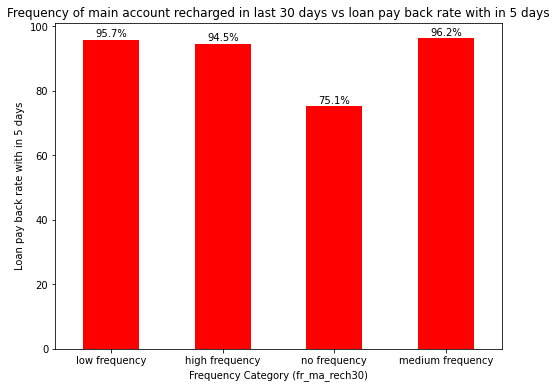

In [13]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',color = ('red'),figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1, label+'%',  ha = 'center',color = 'black')

From above bar plot we can observe that how customers with different frequency levels (main account recharge) are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days. Coming to the average and low & medium frequency people it is observed that around 5%-6% of people are not paying the loan within 5 days.
Coming to low frequency level people, it is observed that around 25% of people are not paying back the loan with in stipulated 5 days of time. The 25% people who are not getting their main account recharge for 30 days creating a major loss to the company without paying back the loan within five days of time.

In [14]:
dat = [df]
for column in data:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [15]:
count_loan = pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan= count_loan.transpose()

In [16]:
fre = pd.DataFrame(df['loan_frequency_group'].value_counts())
fre['% Subscription'] = count_loan[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

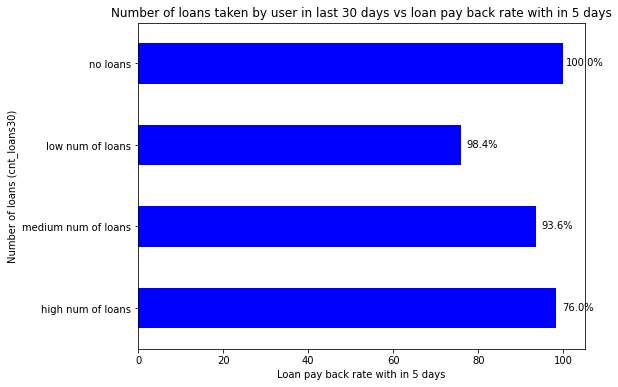

In [17]:
plot_fre = fre['% Subscription'].plot(kind = 'barh', color = ('blue'), figsize = (8,6))
                                              
plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5,rec.get_y()+ rec.get_height()-0.3,label+'%',ha = 'center',va='bottom') 
    

From above bar plot we can observe that how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In [18]:
data = [df]
for column in data:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [19]:
count_loanamnt = pd.crosstab(df['label'],df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt = count_loanamnt.transpose()

In [20]:
fre= pd.DataFrame(df['loanamnt_frequency_group'].value_counts())
fre['% Subscription'] = count_loanamnt[1]
fre.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

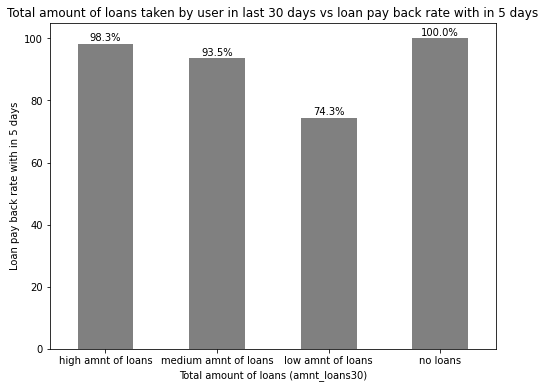

In [21]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',color = ('grey'), figsize = (8,6))
                                               
plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2,rec.get_height() + 1,label+'%',ha = 'center', color = 'black') 
                                         

The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.
Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the low amount level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people taken high amount of loans are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In [22]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [23]:
# As 'Unnamed: 0','msisdn', 'pcircle', 'pdate' features are not having much importance, we can ignore them. 
# And also removing the extra columns created for the visualization part

df.drop(['Unnamed: 0','msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


# Check for the correlation with the dependent variable 'Label'

In [24]:
corr_data = df
corr = corr_data.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


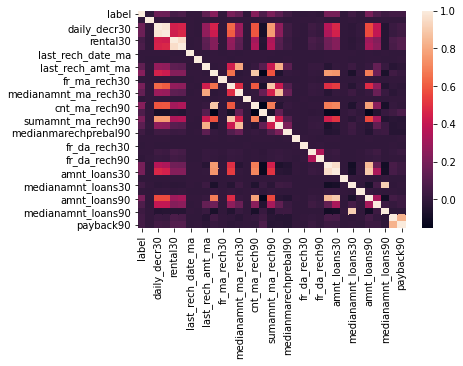

In [25]:
corr_data = df
corr = corr_data.corr()
sns.heatmap(corr,annot_kws={'size':10})

In [26]:
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(209593, 33)
(161465, 33)


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
vif= pd.DataFrame()
vif['Features'] = df_final.columns
vif['vif']=[variance_inflation_factor(df_final.values,i) for i in range(df_final.shape[1])]


In [29]:
vif[vif['vif']>4]

,Features,vif
0,label,8.110744
2,daily_decr30,45.459952
3,daily_decr90,49.377839
4,rental30,18.855758
5,rental90,20.290152
8,last_rech_amt_ma,7.258202
9,cnt_ma_rech30,31.891545
11,sumamnt_ma_rech30,23.801974
12,medianamnt_ma_rech30,12.014572
14,cnt_ma_rech90,33.077747


Using Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.
From the above results we can see that there are  many features having strong multicollinearity in the data set. This resembles that there is need to go for PCA (Principal Component Analysis).
If we won’t perform PCA the noise or correlation between the independent variables will affect the model prediction and model results. More than 50% of the features are having vif >4 so it is mandatory to perform PCA in order to reduce the multicollinearity effect among the independent variables.

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA()
pca.fit(df_final)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
data_pca= pca.transform(df_final)

In [33]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.73812729, 0.882712  , 0.94109282, 0.96808773, 0.98988965,
       0.9929759 , 0.99566909, 0.99714409, 0.99845931, 0.99949931,
       0.99967523, 0.99983513, 0.99997468, 0.99999762, 0.99999867,
       0.99999915, 0.99999945, 0.99999963, 0.99999977, 0.99999986,
       0.99999994, 0.99999997, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

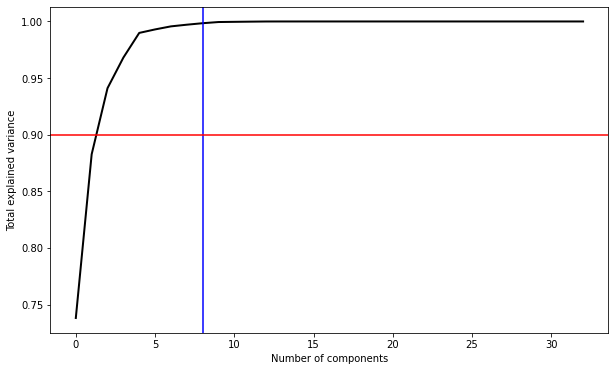

In [34]:
plt.figure(figsize=(10,6))

plt.plot(range(0,33), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()


In [35]:
cov_matrix = np.cov(df_final.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.19484551e-01  1.48240101e+01  3.75039465e+02 ...  7.97561339e-04
   2.07982077e-01  2.41539946e-01]
 [ 1.48240101e+01  2.46510384e+05  2.01485473e+05 ... -1.83035553e-01
   4.50867556e+01  1.01402659e+02]
 [ 3.75039465e+02  2.01485473e+05  3.20456813e+07 ... -1.23297953e+01
   3.55015475e+03  5.45421995e+03]
 ...
 [ 7.97561339e-04 -1.83035553e-01 -1.23297953e+01 ...  6.06785987e-03
   2.59351828e-03  4.87621940e-03]
 [ 2.07982077e-01  4.50867556e+01  3.55015475e+03 ...  2.59351828e-03
   1.78829563e+01  1.65668785e+01]
 [ 2.41539946e-01  1.01402659e+02  5.45421995e+03 ...  4.87621940e-03
   1.65668785e+01  2.45413587e+01]]


In [36]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [37]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]


In [38]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 73.8127291   88.27119976  94.10928248  96.80877291  98.9889654
  99.29759013  99.56690899  99.71440869  99.84593062  99.94993095
  99.96752285  99.98351285  99.99746816  99.99976209  99.99986673
  99.99991502  99.99994468  99.9999629   99.9999771   99.99998625
  99.99999372  99.99999684  99.99999858  99.99999968  99.9999999
  99.99999995  99.99999999  99.99999999 100.         100.
 100.         100.         100.        ]


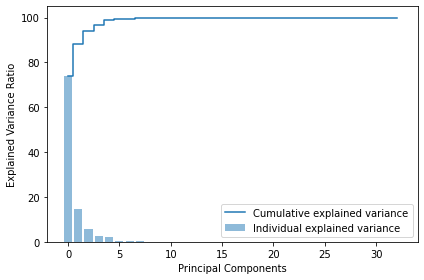

In [39]:
plt.figure(figsize=(6 , 4))
plt.bar(range(33), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(33), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [40]:
pca = PCA(n_components=13)
pca.fit(df_final)
data_pca = pd.DataFrame(pca.transform(df_final))
data_pca.shape

(161465, 13)

In [41]:
x=data_pca
y=df_final['label']

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(113025, 13)
(48440, 13)
(113025,)
(48440,)


# LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
pre=LR.predict(x_test)
LR.score(x_test,y_test)

0.8571428571428571

In [44]:
score=cross_val_score(LR,x,y,cv=10)
score.mean()


0.7501941736199818

[[ 2816  3853]
 [ 3067 38704]]


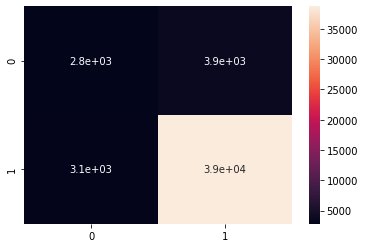

In [45]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [46]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.674414032893663


Text(0.5, 0, 'False Positive Rate')

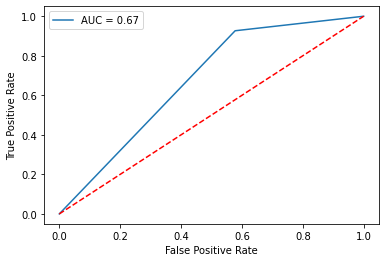

In [47]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# GaussianNB

In [48]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(x_train,y_train)
pre=GB.predict(x_test)
GB.score(x_test,y_test)

0.5684971098265896

In [49]:
score=cross_val_score(GB,x,y,cv=10)
score.mean()

0.5684761495154327

[[ 5610  1059]
 [19843 21928]]


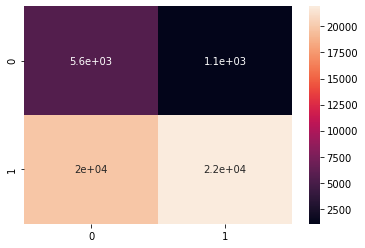

In [50]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [51]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6830815422258238


Text(0.5, 0, 'False Positive Rate')

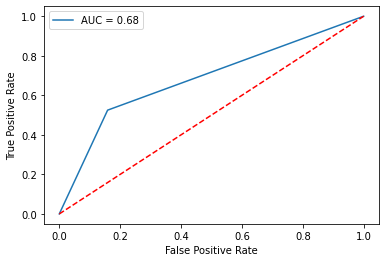

In [52]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# DecisionTreeClassifie

In [53]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pre=DT.predict(x_test)
DT.score(x_test,y_test)

0.8433526011560694

In [54]:
score=cross_val_score(DT,x,y,cv=10)
score.mean()

0.8463382525794174

[[ 3079  3590]
 [ 3998 37773]]


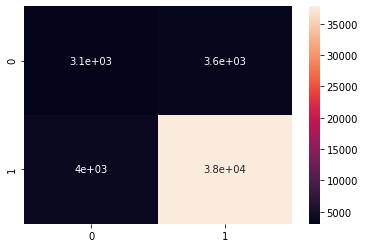

In [55]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.682988036373475


Text(0.5, 0, 'False Positive Rate')

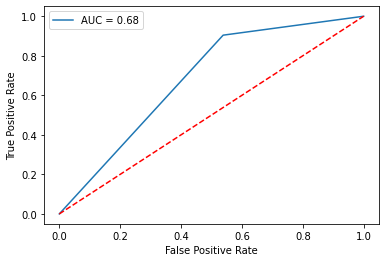

In [57]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pre=KNN.predict(x_test)
KNN.score(x_test,y_test)

0.8752683732452519

In [59]:
score=cross_val_score(KNN,x,y,cv=10)
score.mean()

0.8749016635230523

[[ 2550  4119]
 [ 1923 39848]]


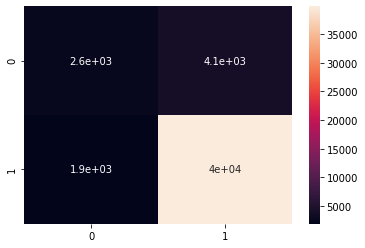

In [60]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [61]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6681647238984298


Text(0.5, 0, 'False Positive Rate')

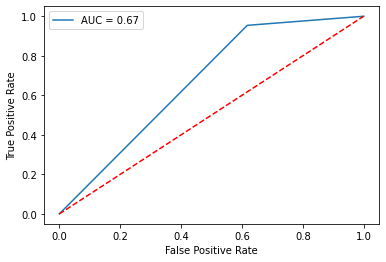

In [62]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# GradientBoostingClassifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pre=GBC.predict(x_test)
GBC.score(x_test,y_test)

0.8815028901734104

In [64]:
score=cross_val_score(GBC,x,y,cv=10)
score.mean()

0.8809277589625804

[[ 1751  4918]
 [  822 40949]]


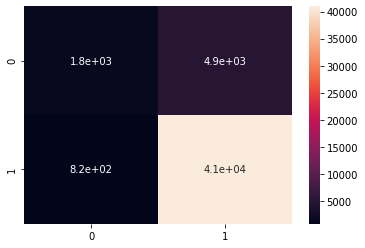

In [65]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [66]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6214396900947252


Text(0.5, 0, 'False Positive Rate')

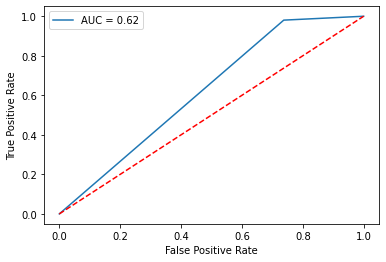

In [67]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pre=RFC.predict(x_test)
RFC.score(x_test,y_test)

0.8951279933938894

In [69]:
score=cross_val_score(RFC,x,y,cv=10)
score.mean()

0.8953333508087251

[[ 2789  3880]
 [ 1200 40571]]


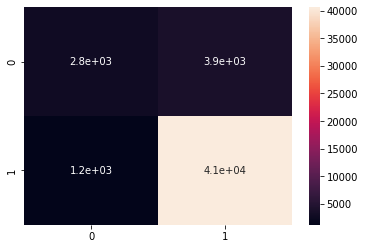

In [70]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [71]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6947377819022589


Text(0.5, 0, 'False Positive Rate')

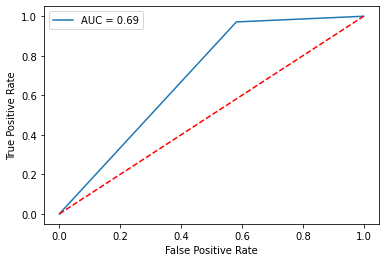

In [72]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# AdaBoostClassifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pre=ABC.predict(x_test)
ABC.score(x_test,y_test)

0.874587118084228

In [74]:
score=cross_val_score(ABC,x,y,cv=10)
score.mean()

0.873210924350724

[[ 1167  5502]
 [  573 41198]]


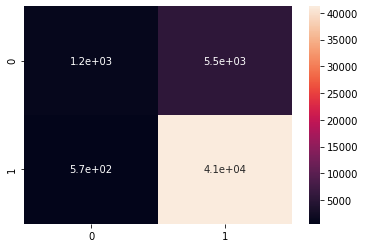

In [75]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [76]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.5806355514671155


Text(0.5, 0, 'False Positive Rate')

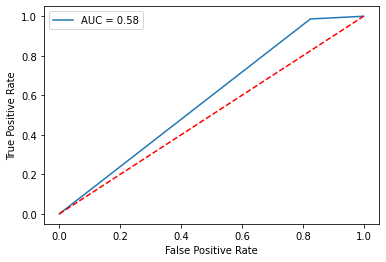

In [77]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# BaggingClassifier

In [78]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pre=BC.predict(x_test)
BC.score(x_test,y_test)

0.8866019818331957

In [79]:
score=cross_val_score(BC,x,y,cv=10)
score.mean()

0.8868237827900545

[[ 3224  3445]
 [ 2048 39723]]


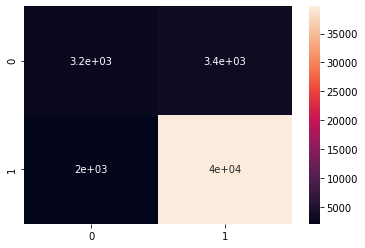

In [80]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [81]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.7172007842071056


Text(0.5, 0, 'False Positive Rate')

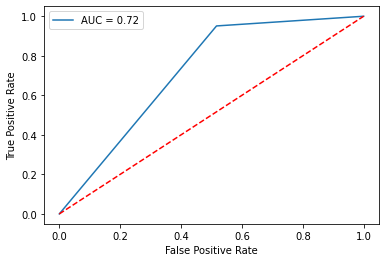

In [82]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


# XGBClassifier

In [83]:
from xgboost import XGBClassifier
XX=XGBClassifier()
XX.fit(x_train,y_train)
pre=XX.predict(x_test)
XX.score(x_test,y_test)

0.8799752270850537

In [84]:
score=cross_val_score(XX,x,y,cv=10)
score.mean()


0.8792989258671401

[[ 1543  5126]
 [  688 41083]]


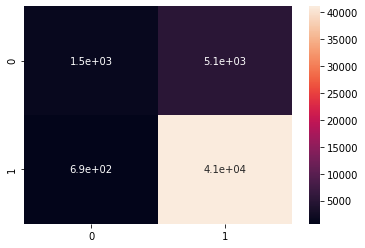

In [85]:
cm=confusion_matrix(y_test,pre)
sns.heatmap(cm,annot=True)
print(cm)

In [86]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6074491318093969


Text(0.5, 0, 'False Positive Rate')

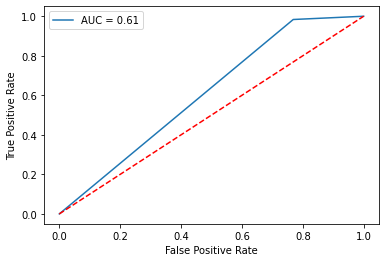

In [87]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

I choose RandomForestClassifier as my final model because it give good accuracy_score.